# Title

# Lib Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
import streamlit as st


st.write(
'''
# Hello World
'''
)

2021-04-29 21:24:30.876 WARNING root: 
  command:

    streamlit run /usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py [ARGUMENTS]


# Data Collection

In [148]:
youtube_path = '../data/US_youtube_trending_data.csv'

youtube = pd.read_csv(youtube_path)

df = pd.DataFrame(youtube)

## todos

In [4]:
# add api

In [5]:
# add json russia data

In [6]:
# add csv brazil data 

# Data Processing 

## Clean 

In [7]:
# inspect data
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [482]:
# add missing category str column
df['category'] = ''

In [483]:
# loop through category columnn, map int ids to str values, calc totals

cat_list = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 
             'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 
             'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 
             'Science & Technology', 'Nonprofits & Activism']

for i,cat in enumerate(df.iterrows()):
    if cat[1].categoryId == 2:
        df.loc[i,'category'] = cat_list[0]
    elif cat[1].categoryId == 1:
        df.loc[i,'category'] = cat_list[1]
    elif cat[1].categoryId == 10:
        df.loc[i,'category'] = cat_list[2]
    elif cat[1].categoryId == 15:
        df.loc[i,'category'] = cat_list[3]
    elif cat[1].categoryId == 17:
        df.loc[i,'category'] = cat_list[4]
    elif cat[1].categoryId == 19:
        df.loc[i,'category'] = cat_list[5]
    elif cat[1].categoryId == 20:
        df.loc[i,'category'] = cat_list[6]
    elif cat[1].categoryId == 22:
        df.loc[i,'category'] = cat_list[7]
    elif cat[1].categoryId == 23:
        df.loc[i,'category'] = cat_list[8]
    elif cat[1].categoryId == 24:
        df.loc[i,'category'] = cat_list[9]
    elif cat[1].categoryId == 25:
        df.loc[i,'category'] = cat_list[10]
    elif cat[1].categoryId == 26:
        df.loc[i,'category'] = cat_list[11]
    elif cat[1].categoryId == 27:
        df.loc[i,'category'] = cat_list[12]
        
    elif cat[1].categoryId == 28:
        df.loc[i,'category'] = cat_list[13]
    elif cat[1].categoryId == 29:
        df.loc[i,'category'] = cat_list[14]

df.category.value_counts()

Music                    10425
Entertainment            10202
Gaming                    6429
Sports                    5772
People & Blogs            4299
Comedy                    2895
Science & Technology      2111
Howto & Style             2110
News & Politics           2058
Autos & Vehicles          1956
Education                 1076
Film & Animation           929
Pets & Animals             310
Travel & Events            188
Nonprofits & Activism       31
Name: category, dtype: int64

In [10]:
# reorder category column, place left of categoryId

def move_column(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

df = move_column(df,
                 cols_to_move=['category'],
                 ref_col='publishedAt',
                 place='After')
df.head()

,video_id,title,publishedAt,category,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,People & Blogs,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Gaming,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,Entertainment,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,Music,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Howto & Style,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [11]:
#isolate date 
for i, row in enumerate(df.publishedAt):
    df.loc[i, 'publishedAt'] = row[:10]
    
for i, row in enumerate(df.trending_date):
    df.loc[i, 'trending_date'] = row[:10]
    

In [12]:
# p is for published 
# t = trending 

#split in order to analyze y-y, m-m, and d-d changes 

# Split review dates by year, month and day (strings)
time_split = df.publishedAt.str.split('-', n=2, expand=True)
df['p_year'] = time_split[0]
df['p_month'] = time_split[1]
df['p_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.publishedAt
df.publishedAt = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
df['p_month_year'] = pd.to_datetime(df['publishedAt']).dt.to_period('M')

# Split review dates by year, month and day (strings)
time_split = df.trending_date.str.split('-', n=2, expand=True)
df['t_year'] = time_split[0]
df['t_month'] = time_split[1]
df['t_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.trending_date
df.trending_date = [d.date() for d in pd.to_datetime(dates)]


# Extract month and year from review dates
df['t_month_year'] = pd.to_datetime(df['trending_date']).dt.to_period('M')

In [13]:
df.head()


df.ratings_disabled.value_counts()

False    50463
True       328
Name: ratings_disabled, dtype: int64

In [477]:
df1 = df.copy()

df1 = df1[(df1.ratings_disabled == False) & (df1.comments_disabled == False)]

df1=df1.drop(['video_id','channelId','categoryId','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1)

df1.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196


## Visualization

### Heatmap

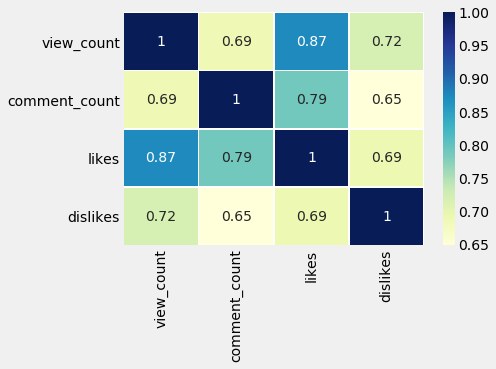

In [48]:
#review or ditch 

#80% are highly correlated - view count and likes 

# how to numbers in a heatmap sns 
#all have positive 

# view counts are most correlated with likes
correlation = df1[['view_count', 'comment_count', 'likes', 'dislikes']].corr()
sns.heatmap(correlation, annot=True, linewidths=.5, cmap="YlGnBu")

### Top 10 Most Viewed Categories & Channels

In [31]:
# plt.style.available

In [478]:
# df1.category.value_counts()
df1.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196


In [480]:
# df1.category.value_counts()[:10].sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'category'

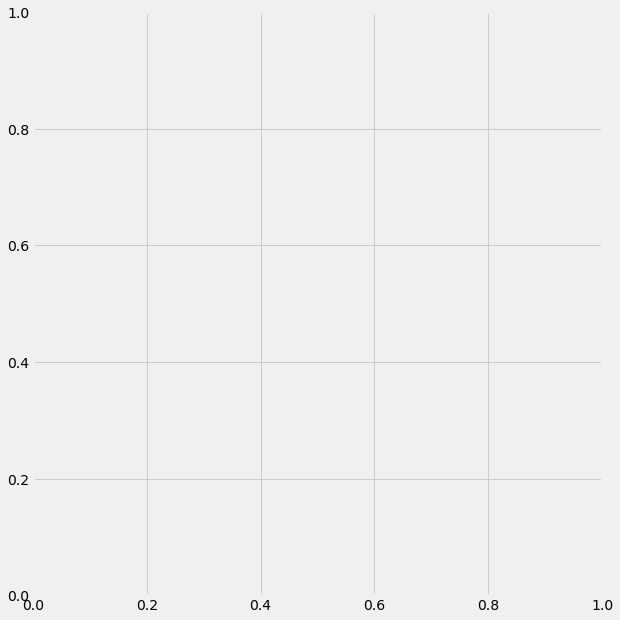

In [484]:
# check #


plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
pad = 10
# n = 3
# c = np.random.rand(n)

# plot 10 most viewed categories
ax1 = plt.subplot(1,2,1)


# sort top 10 category values 
top_cat = df1.category.value_counts()[:10].sort_values()

# set max color
cat_co = ['grey' if (x < max(top_cat)) else 'red' for x in top_cat ]

top_cat.plot(kind='barh', width=0.9, ax=ax1, color=cat_co)

ax1.set_xlabel('Number of Views', labelpad=pad)
ax1.set_title('Top 10 Most Viewed Categories', fontsize=20)


# plot 10 most viewed channels 
ax2 = plt.subplot(1,2,2)

top_chan = df1.channelTitle.value_counts()[:10].sort_values()

# set max color
chan_co = ['grey' if (x < max(top_chan)) else 'red' for x in top_chan ]

top_chan.plot(kind='barh', width=0.9, ax=ax2, color=chan_co)


ax2.set_xlabel('Number of Views', labelpad=pad)
ax2.set_title('Top 10 Most Viewed Channels', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
# plt.show()

In [58]:
top_cat.sort_values(ascending=False)

Music                   10374
Entertainment            9933
Gaming                   6329
Sports                   5699
People & Blogs           4057
Comedy                   2886
Howto & Style            2066
Science & Technology     1928
Autos & Vehicles         1924
News & Politics          1822
Name: category, dtype: int64

In [209]:
df1.head()

,title,publishedAt,category,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,p_year,p_month,p_day,p_month_year,t_year,t_month,t_day,t_month_year
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,People & Blogs,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020,08,11,2020-08,2020,08,12,2020-08
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,Gaming,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020,08,11,2020-08,2020,08,12,2020-08
2,I left youtube for a month and THIS is what ha...,2020-08-11,Entertainment,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020,08,11,2020-08,2020,08,12,2020-08
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,Music,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,2020,08,11,2020-08,2020,08,12,2020-08
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,Howto & Style,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,2020,08,11,2020-08,2020,08,12,2020-08


In [213]:
df1['view_count']

0        1514614
1        2381688
2        2038853
3         496771
4        1123889
          ...   
50785     739489
50786    1913551
50788     455773
50789     768118
50790     653331
Name: view_count, Length: 49518, dtype: int64

In [216]:
# df1['view_count'].apply(lambda x: x)

view_count_str = df1['view_count'].astype('str')

view_count = view_count_str
# df1['view_count'] = df1.apply(lambda x: int(x['view_count'].replace(',', '')),axis=1)

In [184]:
# df1.apply(lambda x: x, axis=1)

In [485]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49518 entries, 0 to 50790
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          49518 non-null  object
 1   publishedAt    49518 non-null  object
 2   channelTitle   49518 non-null  object
 3   trending_date  49518 non-null  object
 4   tags           49518 non-null  object
 5   view_count     49518 non-null  int64 
 6   likes          49518 non-null  int64 
 7   dislikes       49518 non-null  int64 
 8   comment_count  49518 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [487]:
byCat_max_views = df1.groupby(by=['category'])['view_count'].sum().nlargest()

byCat_max_views


# byCat = byCat.sum().style.format('{0:,.0f}')

KeyError: 'category'

In [489]:

# byCat = df1.groupby(by=['category']).sum()

# sorted_byCat = df1.sort_values('view_count', ascending=False)

# sorted_byCat = 

df1.sort_values('category', ascending=True).groupby(['category']).apply(lambda x: x.sort_values(['view_count'], ascending=True))

# grouped_byCat = sorted_byCat.groupby('category')

# grouped_byCat.get_group('Music').sum()


# byCat.copy()

# byCat.sort_values(['view_count','comment_count'], axis=0)




# .style.format('{0:,.0f}')

# def negative_red(val):
#     color = 'red' if val < 0 else 'green'
#     return 'color: %s' % color

# def highlight(val):
#     yellow = 'background-color: yellow' if val > 1000**3.5 else ''
# #     yellow = 'background-color: yellow' if val >  else ''
#     return yellow


# byCat.style.applymap(negative_red)

# byCat.style.format('{0:,.0f}').applymap(highlight)




KeyError: 'category'

In [450]:
df1['category']

0              People & Blogs
1                      Gaming
2               Entertainment
3                       Music
4               Howto & Style
                 ...         
50785    Science & Technology
50786                  Gaming
50788                  Gaming
50789        Autos & Vehicles
50790           Howto & Style
Name: category, Length: 49518, dtype: object

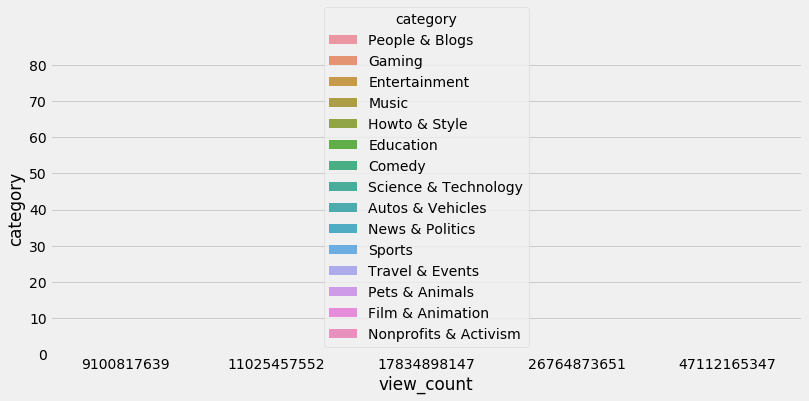

In [461]:
plt.figure(figsize=(12,5))

sns.barplot(x=byCat_max_views, y=top_cat, hue=df1['category'] )

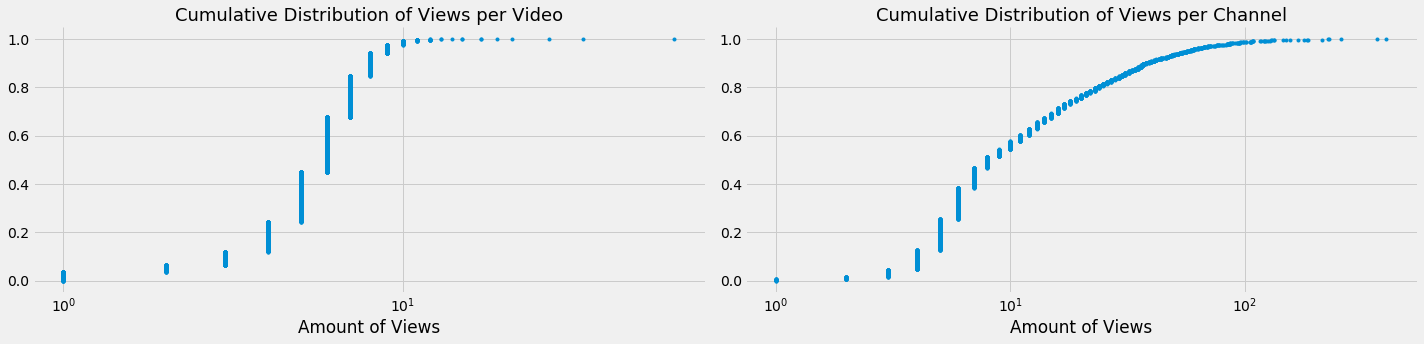

In [405]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    

    # y-data for the ECDF: y
    
    y = np.arange(1, n + 1) / n

    return x, y

plt.figure(figsize=(20,5))


# Plot cumulative distribution of views per video
x, y = ecdf(df1.groupby('title').view_count.count())

ax2 = plt.subplot(1,2,1)
ax2.set_xlabel('Amount of Views')

ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Views per Video', fontsize=18)


# Plot cumulative distribution of views per channel 
x, y = ecdf(df1.groupby('channelTitle').view_count.count())

ax3 = plt.subplot(1,2,2)
ax3.set_xlabel('Amount of Views')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Views per Channel', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()

# plt.show()

### fig 1 Average Views per Channel

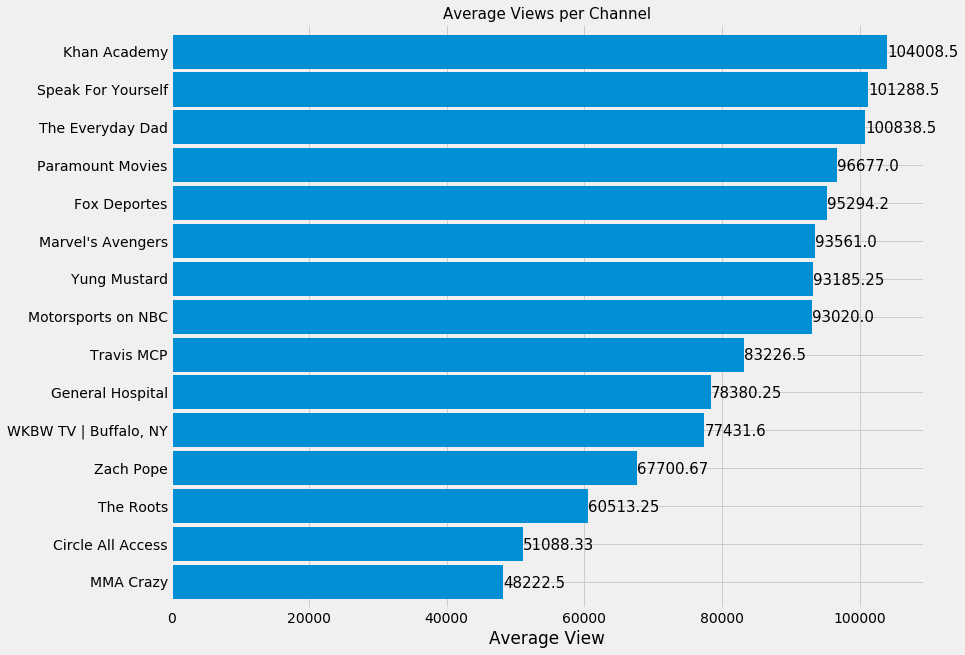

In [64]:
plt.figure(figsize=(12,10))

# Plot average rating by product category
ax = df1.groupby('channelTitle').view_count.mean().sort_values()[:15].plot.barh(width=0.9)
ax.set_title('Average Views per Channel', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

# plt.show()

### fig 2 – Average Views per Category

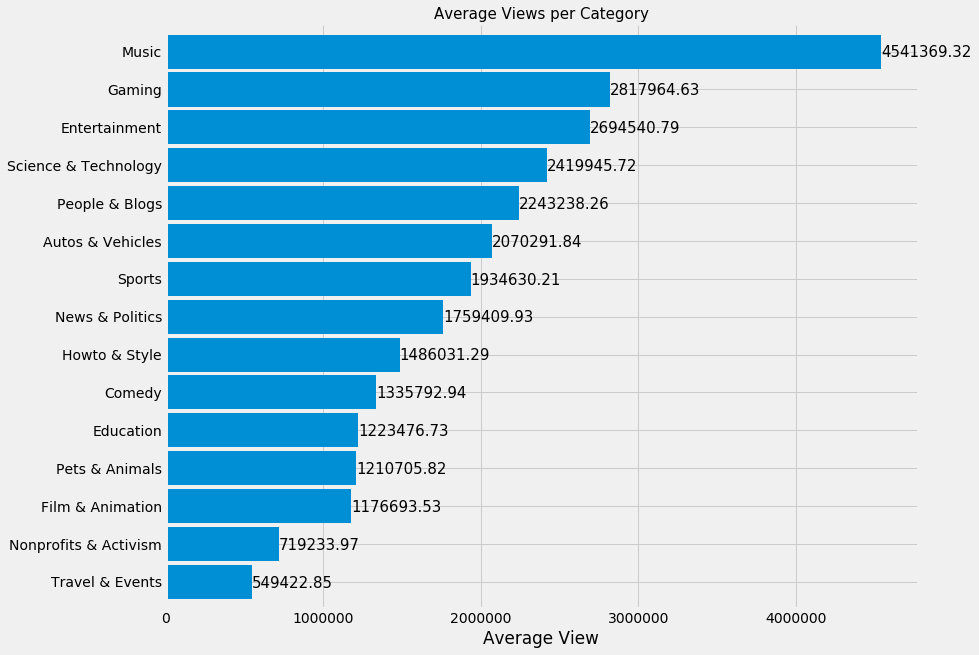

In [22]:
plt.figure(figsize=(12,10))

# plot average Views per Category 
ax = df1.groupby('category').view_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Views per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# xreate a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()


### fig 3 Average Comments per Category

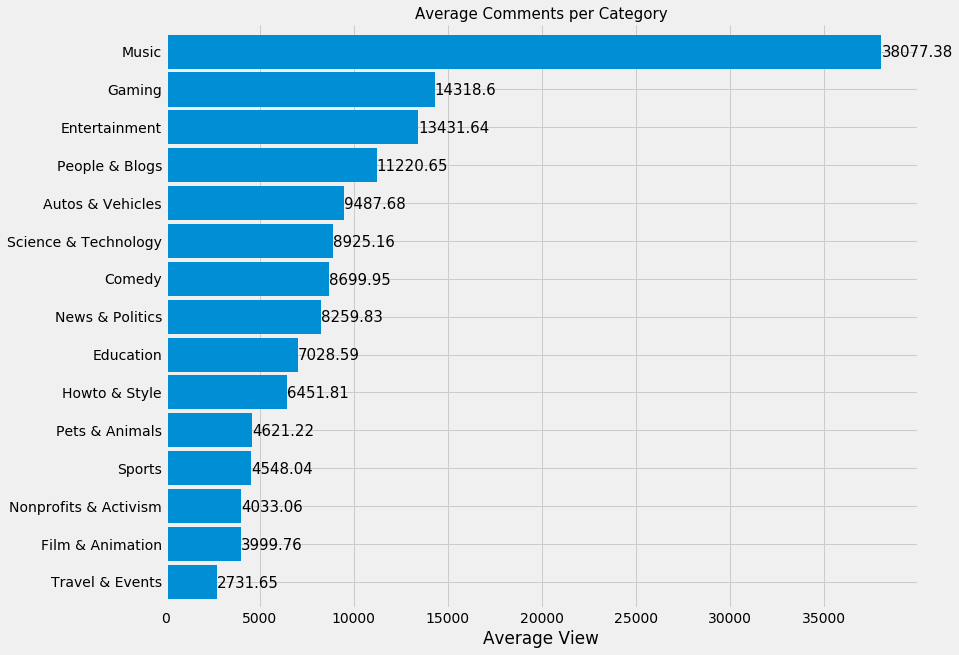

In [23]:
plt.figure(figsize=(12,10))

# Plot average 
ax = df1.groupby('category').comment_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Comments per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

### fig 4 Average Views per Video

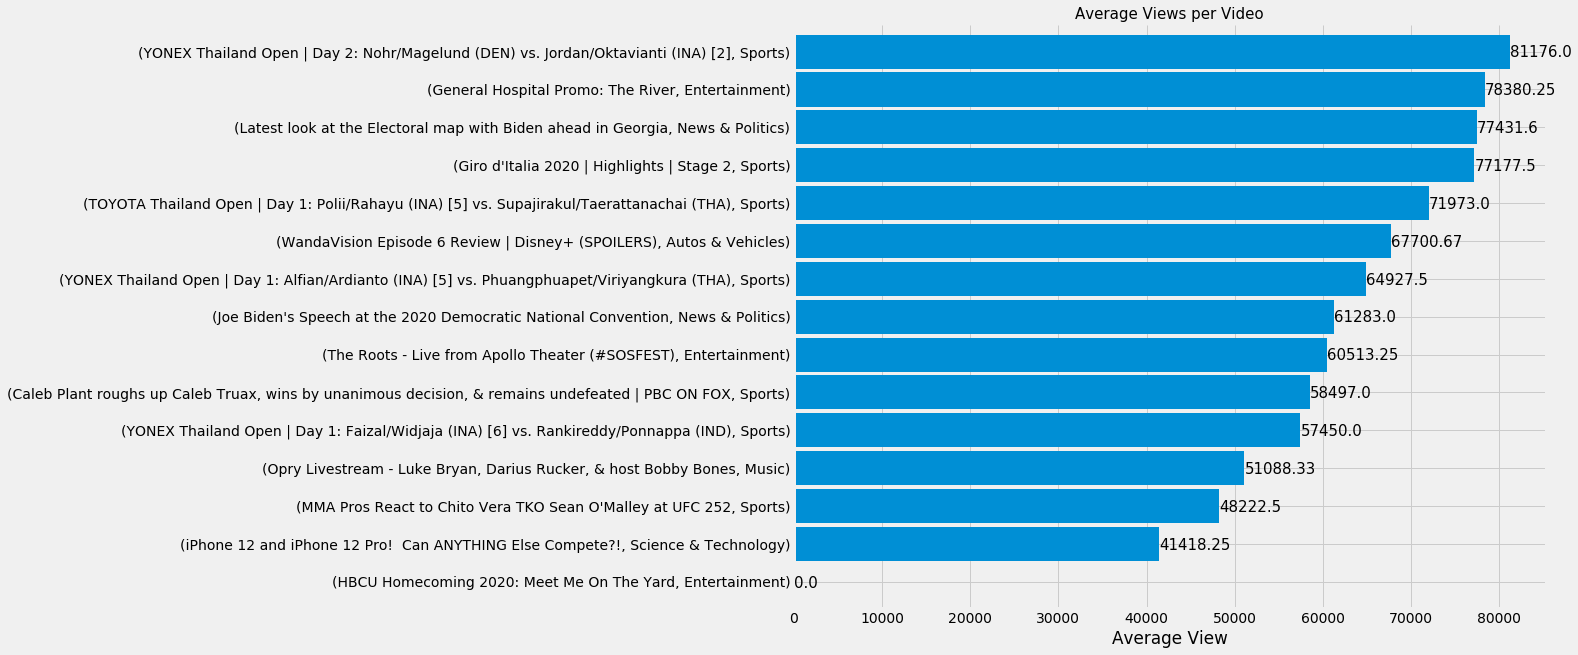

In [32]:
# add colors fo each colors
plt.figure(figsize=(12,10))

# Plot average views per title
ax = df1.groupby(['title','category']).view_count.mean().sort_values()[:15].plot.barh(width=0.9)
ax.set_title('Average Views per Video', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()


In [26]:
# review how to incorporate title

# for i, cat in enumerate(cat_list):
#     correlation = df1[df1.category == cat][['view_count', 'comment_count', 'likes', 'dislikes']].corr()
#     sns.heatmap(correlation)
#     plt.show()

TypeError: float() argument must be a string or a number, not 'Period'

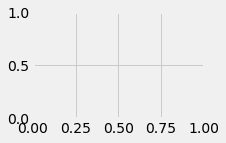

In [27]:
# TypeError: float() argument must be a string or a number, not 'Period'
#

p_grouped = df1.groupby('p_month_year').mean().reset_index()
t_grouped = df1.groupby('t_month_year').mean().reset_index()

plt.figure()

ax1 = plt.subplot(2,2,1)
ax1.plot('p_month_year', 'view_count', data=p_grouped, linewidth=2)
ax1.plot('t_month_year', 'view_count', data=p_grouped, linewidth=2)

# ax2 = plt.subplot(2,2,2)
# ax2.plot('p_month_year', 'comment_count', data=p_grouped, linewidth=2)
# ax2.plot('t_month_year', 'comment_count', data=p_grouped, linewidth=2)

# ax3 = plt.subplot(2,2,3)
# ax3.plot('p_month_year', 'likes', data=p_grouped, linewidth=2)
# ax3.plot('t_month_year', 'likes', data=p_grouped, linewidth=2)

# ax4 = plt.subplot(2,2,4)
# ax4.plot('p_month_year', 'dislikes', data=p_grouped, linewidth=2)
# ax4.plot('t_month_year', 'dislikes', data=p_grouped, linewidth=2)

plt.show()


In [ ]:
# create line graph 
#x
p_grouped



In [ ]:

grouped = df1.groupby(['category']).sum()

# stacked bar graph by category to show

grouped.T.reset_index()


In [ ]:
# show the change in average views/counts/l/d for published and trending  

df1.groupby('p_month_year').mean().reset_index()
df1.groupby('t_month_year').mean().reset_index()


In [ ]:
df1.head()


In [ ]:
df1.info()


In [ ]:
# df.tags.value_counts()
# adf.channelId.value_counts

In [ ]:
# 

In [ ]:
# why are there dupe tags 
# look at individually each for 94, 77, 76, examine difference in view counts for videos 
df1.tags.value_counts()

In [ ]:
# look at the difference from publsiuehd and trending views/likes ratio 

In [ ]:
#combine (sum) rows that have same title/channel/date 


# counts / comment conunts, likes /dislikes 
